# Gerekli Kütüphanelerin Kurulumu

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# 2. Adım Veriyi yükleme ve Gözlemleme

In [2]:
# Veriyi yükleyelim
sales_data = pd.read_csv('/kaggle/input/competitive-data-science-predict-future-sales/sales_train.csv')
print(sales_data.head())


         date  date_block_num  shop_id  item_id  item_price  item_cnt_day
0  02.01.2013               0       59    22154      999.00           1.0
1  03.01.2013               0       25     2552      899.00           1.0
2  05.01.2013               0       25     2552      899.00          -1.0
3  06.01.2013               0       25     2554     1709.05           1.0
4  15.01.2013               0       25     2555     1099.00           1.0


# 3. Adım Model performansı için aykırı değerleri kaldırma


In [3]:
# Eksik değer kontrolü
print(sales_data.isnull().sum())

# Veri türlerini ve temel istatistikleri inceleme
print(sales_data.info())
print(sales_data.describe())

# Aykırı değerleri bulma (örn. Negatif satışlar, çok büyük değerler)
sales_data = sales_data[sales_data['item_price'] > 0]
sales_data = sales_data[sales_data['item_cnt_day'] > 0]

# Tarihleri datetime formatına çevirme
sales_data['date'] = pd.to_datetime(sales_data['date'], format='%d.%m.%Y')


date              0
date_block_num    0
shop_id           0
item_id           0
item_price        0
item_cnt_day      0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
 #   Column          Dtype  
---  ------          -----  
 0   date            object 
 1   date_block_num  int64  
 2   shop_id         int64  
 3   item_id         int64  
 4   item_price      float64
 5   item_cnt_day    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 134.4+ MB
None
       date_block_num       shop_id       item_id    item_price  item_cnt_day
count    2.935849e+06  2.935849e+06  2.935849e+06  2.935849e+06  2.935849e+06
mean     1.456991e+01  3.300173e+01  1.019723e+04  8.908532e+02  1.242641e+00
std      9.422988e+00  1.622697e+01  6.324297e+03  1.729800e+03  2.618834e+00
min      0.000000e+00  0.000000e+00  0.000000e+00 -1.000000e+00 -2.200000e+01
25%      7.000000e+00  2.200000e+01  4.476000e+03  2.490000e+02 

# 4. Adım Görselleştirme

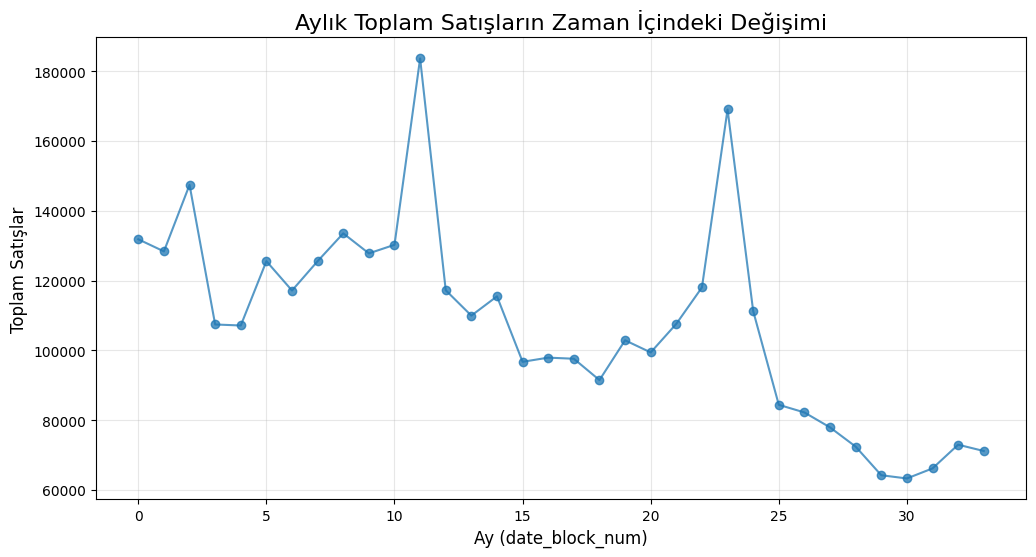

In [4]:
# Aylık toplam satışları hesaplama
monthly_sales = sales_data.groupby('date_block_num').agg({
    'item_cnt_day': 'sum'
}).reset_index()
monthly_sales.rename(columns={'item_cnt_day': 'total_sales'}, inplace=True)

# Görselleştirme
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['date_block_num'], monthly_sales['total_sales'], marker='o', linestyle='-', alpha=0.75)
plt.title("Aylık Toplam Satışların Zaman İçindeki Değişimi", fontsize=16)
plt.xlabel("Ay (date_block_num)", fontsize=12)
plt.ylabel("Toplam Satışlar", fontsize=12)
plt.grid(alpha=0.3)
plt.show()


# 5. Adım Özellik Mühendisliği

In [5]:
# Aylık toplam satışları hesaplayalım
monthly_data = sales_data.groupby(['date_block_num', 'shop_id', 'item_id']).agg({
    'item_cnt_day': 'sum'
}).reset_index()

# Kolonları düzenleme
monthly_data.rename(columns={'item_cnt_day': 'item_cnt_month'}, inplace=True)
print(monthly_data.head())


   date_block_num  shop_id  item_id  item_cnt_month
0               0        0       32             6.0
1               0        0       33             3.0
2               0        0       35             1.0
3               0        0       43             1.0
4               0        0       51             2.0


# 6. Adım Veri setini ayırma ve oluşturma

In [6]:
# X ve y oluşturma
X = monthly_data[['date_block_num', 'shop_id', 'item_id']]
y = monthly_data['item_cnt_month']

# Eğitim ve test setlerini ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# 7. Adım model eğitimi

In [7]:
# Modeli eğitme
model = LinearRegression()
model.fit(X_train, y_train)

# Test seti tahmini
y_pred = model.predict(X_test)

# Performans metriği
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 79.69708835181014


# 8. Adım Performans Metriklerinin kullanımı ve Model ölçümü 

### Regresyon problemleri için yaygın performans metrikleri şunlardır:

Mean Absolute Error (MAE): Tahmin ve gerçek değerler arasındaki mutlak farkların ortalamasını ölçer.

Mean Squared Error (MSE): Hata karelerinin ortalamasını ölçer (daha büyük hatalara daha çok önem verir).

Root Mean Squared Error (RMSE): MSE'nin karekökünü alır, yorumlanması daha kolaydır.

R² Score (Determination Coefficient): Modelin veri varyansını ne kadar açıkladığını ölçer.



In [8]:

# Performans metriklerini hesaplama
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Performans sonuçlarını yazdırma
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")


Mean Absolute Error (MAE): 1.76
Mean Squared Error (MSE): 79.70
Root Mean Squared Error (RMSE): 8.93
R² Score: 0.00


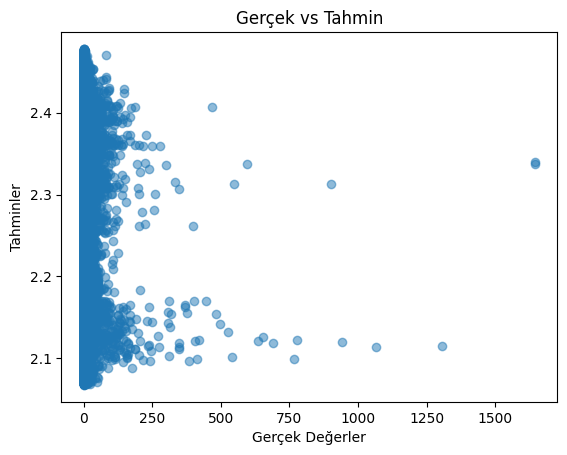

In [9]:
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Gerçek Değerler")
plt.ylabel("Tahminler")
plt.title("Gerçek vs Tahmin")
plt.show()


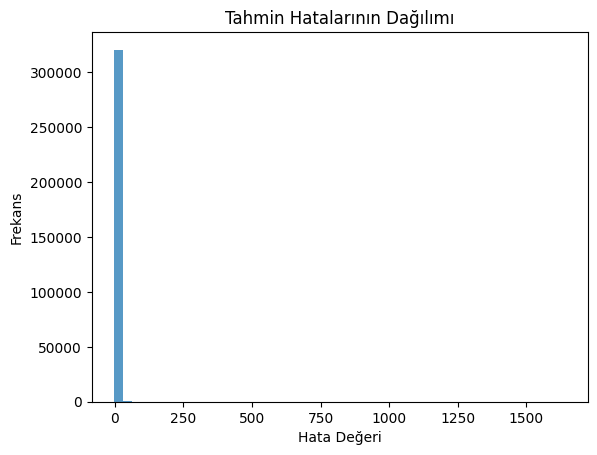

In [10]:
errors = y_test - y_pred
plt.hist(errors, bins=50, alpha=0.75)
plt.xlabel("Hata Değeri")
plt.ylabel("Frekans")
plt.title("Tahmin Hatalarının Dağılımı")
plt.show()
